In [1]:
import pandas as pd
from datetime import datetime
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/drive')



Mounted at /content/drive


Lectura de archivos

In [2]:
df_employee = pd.read_csv('/content/drive/MyDrive/EmpleadoProyectoFiles/employees.csv')
df_project = pd.read_csv('/content/drive/MyDrive/EmpleadoProyectoFiles/projects.csv')
df_employees_projects = pd.read_csv('/content/drive/MyDrive/EmpleadoProyectoFiles/employees_projects.csv')

# **Datos de Empleados**

### **Top 5 empleados que más años llevan en la compañía**

   TX_NOMBRE  TIEMPO
1       Lola      14
4      James      10
12     Pedro      10
10     David       9
9        Ana       8


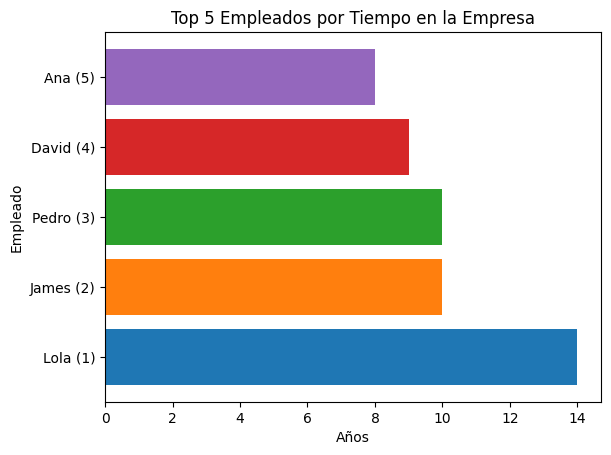

In [5]:
df_employee["F_ALTA"] = pd.to_datetime(df_employee["F_ALTA"])
df_employee["F_BAJA"] = pd.to_datetime(df_employee["F_BAJA"], errors = "coerce")

now = datetime.now()

df_employee['F_BAJA'] = df_employee['F_BAJA'].fillna(now)
df_employee['TIEMPO'] = df_employee['F_BAJA'].dt.year - df_employee['F_ALTA'].dt.year


top_5_empleados = df_employee.nlargest(5, 'TIEMPO')

print(top_5_empleados[['TX_NOMBRE', 'TIEMPO']])

fig, ax = plt.subplots()

nombres = top_5_empleados['TX_NOMBRE']
tiempo = top_5_empleados['TIEMPO']

for i, nombre in enumerate(nombres):
  ax.barh(nombre + f" ({i+1})", tiempo.iloc[i])

ax.set_xlabel("Años")
ax.set_ylabel("Empleado")
ax.set_title("Top 5 Empleados por Tiempo en la Empresa")

plt.show()

### **Top 5 empleados más recientes**


In [6]:
df_employee['ACTUAL'] = datetime.now()
df_employee['RECIENTES'] = df_employee['ACTUAL'] - df_employee['F_ALTA']

top_5_recientes = df_employee.nsmallest(5, 'RECIENTES')

print(top_5_recientes[['TX_NOMBRE', 'RECIENTES']])

   TX_NOMBRE                 RECIENTES
5      María  803 days 20:31:37.213315
6       Juan 1020 days 20:31:37.213315
0       Raúl 1468 days 20:31:37.213315
3      Laura 1470 days 20:31:37.213315
13    Isabel 1909 days 20:31:37.213315


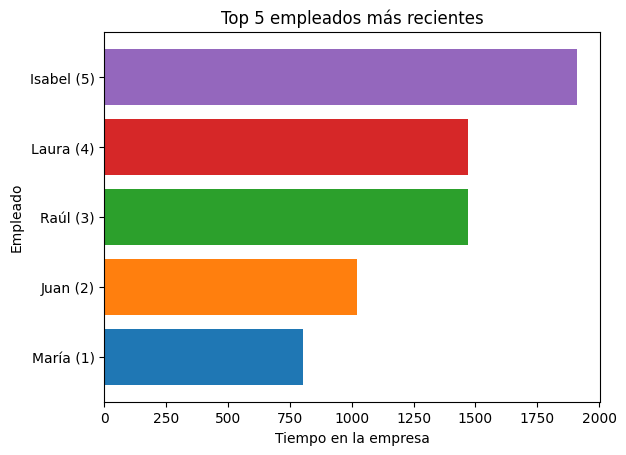

In [7]:
fig, ax = plt.subplots()

nombres = top_5_recientes['TX_NOMBRE']
dias_recientes = top_5_recientes['RECIENTES'].dt.days

for i, nombre in enumerate(nombres):
  ax.barh(nombre + f" ({i+1})", dias_recientes.iloc[i])

ax.set_xlabel("Tiempo en la empresa")
ax.set_ylabel("Empleado")
ax.set_title("Top 5 empleados más recientes")
plt.show()

### **Distribución del número de años de los empleados en la empresa**

 Años  NumEmpleados
    2             1
    3             1
    4             2
    5             1
    6             2
    7             4
    8             2
    9             1
   10             2
   14             1


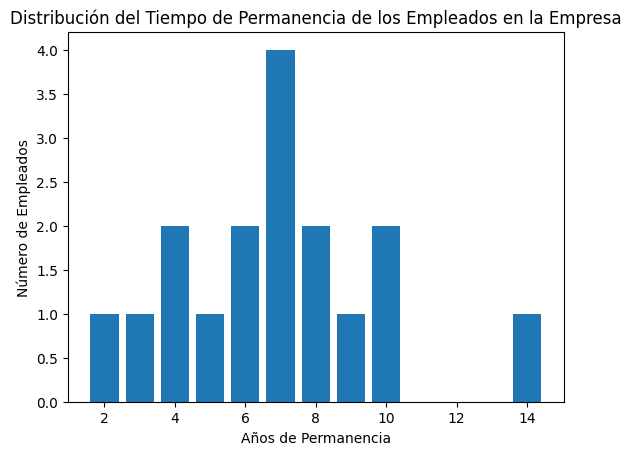

In [8]:
#Dataframe de los años, del mínimo al máximo contemplabe en nuestros datos
years = pd.DataFrame({"Años": range(df_employee["TIEMPO"].min(), df_employee['TIEMPO'].max() + 1) })

#Combinación entre dataframe years y la agrupación por años en df_employee
yearsTable = years.merge(df_employee.groupby('TIEMPO').size().reset_index(name="NumEmpleados"), how="left",
                         left_on="Años", right_on="TIEMPO")

yearsTable["NumEmpleados"] = yearsTable["NumEmpleados"].fillna(0).astype(int)

yearsTableSelected = yearsTable[yearsTable["NumEmpleados"] > 0]

#Imprimimos concretamente los Años y el Número de Empleados
print(yearsTableSelected[["Años", "NumEmpleados"]].to_string(index=False))

#Gráfica
plt.bar(yearsTableSelected['Años'], yearsTableSelected['NumEmpleados'])
plt.xlabel('Años de Permanencia')
plt.ylabel('Número de Empleados')
plt.title('Distribución del Tiempo de Permanencia de los Empleados en la Empresa')
plt.show()

### **Evolución temporal de altas por años**


In [10]:
df_employee["AñoRegistro"] = df_employee["F_ALTA"].dt.year

# Contamos el número de empleados por año de registro. Se ordena y se resetea el índice.
registPerYear = df_employee["AñoRegistro"].value_counts().sort_index().reset_index()

# Nombre para las columnas
registPerYear.columns = ["Año", "Empleados"]

registPerYear

,Año,Empleados
0,2010,1
1,2014,2
2,2015,1
3,2016,2
4,2017,4
5,2018,2
6,2019,1
7,2020,2
8,2021,1
9,2022,1


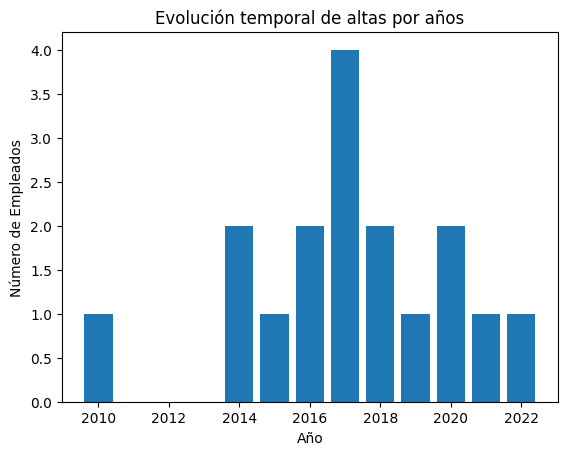

In [11]:
plt.bar(registPerYear['Año'], registPerYear['Empleados'])
plt.xlabel('Año')
plt.ylabel('Número de Empleados')
plt.title('Evolución temporal de altas por años')
plt.show()

### **Evolución temporal de bajas por años**

In [12]:
df_employee["AñoBaja"] = df_employee["F_BAJA"].dt.year

# Cuenta el número de empleados por año de baja. Se ordena y se resetea el índice.
departuresPerYear = df_employee["AñoBaja"].value_counts().sort_index().reset_index()

# Nombre que tendrán las columnas
departuresPerYear.columns = ["Año", "Empleados"]

print(departuresPerYear)



    Año  Empleados
0  2024         17


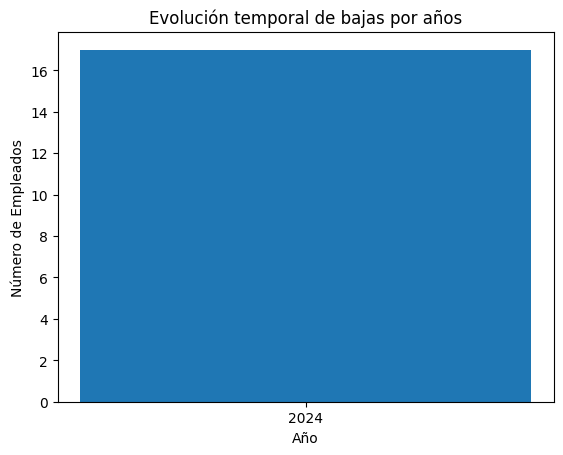

In [13]:
plt.bar(departuresPerYear['Año'], departuresPerYear['Empleados'])
plt.xticks(departuresPerYear["Año"])
plt.xlabel('Año')
plt.ylabel('Número de Empleados')
plt.title('Evolución temporal de bajas por años')
plt.show()

### **¿Cuáles han sido los dos años de mayor crecimiento/decrecimiento de empleados?**


In [18]:
#De entre las altas por año, obtenemos los dos años que más han tenido.
top2Altas = registPerYear.sort_values(by="Empleados", ascending=False).head(2)
print(top2Altas)

    Año  Empleados
4  2017          4
1  2014          2


In [19]:
#De entre las bajas por año, obtenemos los dos mayores.
top2Bajas = departuresPerYear.sort_values(by="Empleados", ascending=False).head(2)
print(top2Bajas)

    Año  Empleados
0  2024         17


Text(0.5, 1.0, 'Años con más bajas')

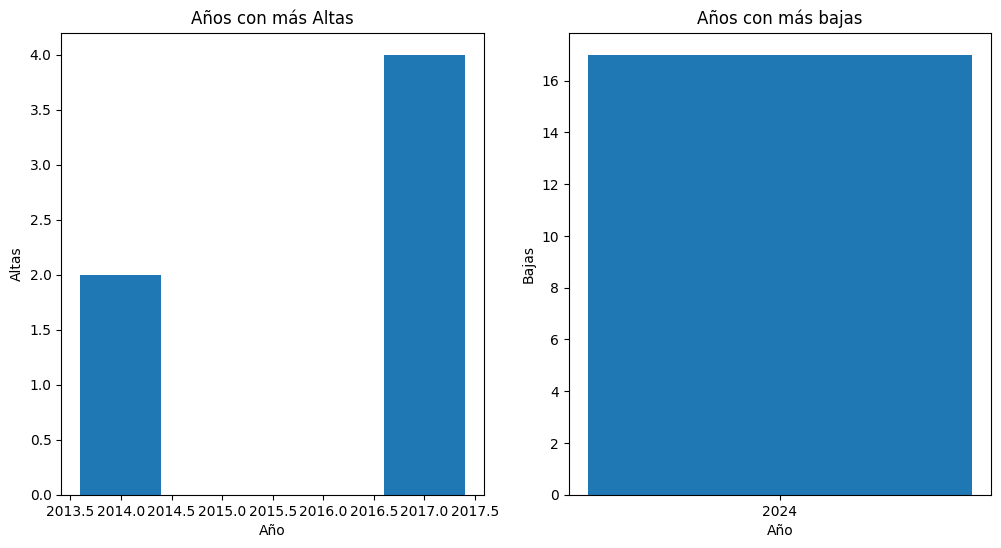

In [29]:
#Ambas gráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Altas
ax1.bar(top2Altas["Año"], top2Altas["Empleados"])
#plt.xticks(registPerYear["Año"])
#plt.yticks(registPerYear["Empleados"])
ax1.set_xlabel("Año")
ax1.set_ylabel("Altas")
ax1.set_title("Años con más Altas")

#Bajas
ax2.bar(top2Bajas["Año"], top2Bajas["Empleados"])
plt.xticks(departuresPerYear["Año"])
ax2.set_xlabel("Año")
ax2.set_ylabel("Bajas")
ax2.set_title("Años con más bajas")

### **Distribución de empleados solteros vs casados**

CX_EDOCIVIL
C    9
S    8
Name: count, dtype: int64


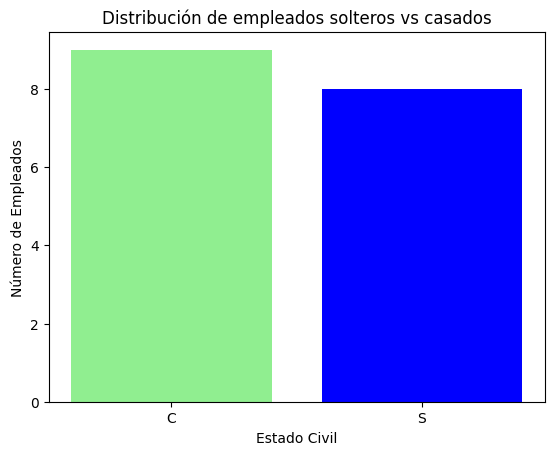

In [30]:
recuento = df_employee["CX_EDOCIVIL"].value_counts()
print(recuento)

fig, axes = plt.subplots()
axes.bar(recuento.index, recuento.values, color=['lightgreen', 'blue'])
plt.xlabel('Estado Civil')
plt.ylabel('Número de Empleados')
plt.title('Distribución de empleados solteros vs casados')
plt.show()

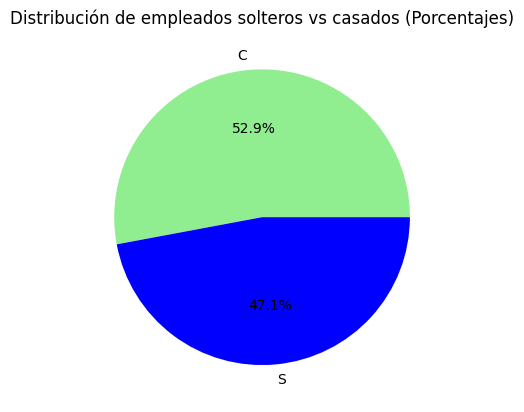

In [31]:
plt.pie(recuento.values, labels=recuento.index, colors=['lightgreen', 'blue'], autopct='%1.1f%%')
plt.title('Distribución de empleados solteros vs casados (Porcentajes)')
# Mostrar el gráfico
plt.show()

### **Distribución de la edad de los empleados**


In [32]:
#Dataframe con la fecha de nacimiento pasada a datetime
df_employee["F_NACIMIENTO"] = pd.to_datetime(df_employee["F_NACIMIENTO"])

#Función para obtener la edad exacta
def howOld(birthDate):
    now = pd.to_datetime('now')
    age = now.year - birthDate.year - ((now.month, now.day) < (birthDate.month, birthDate.day))
    return age

#Aplicamos la función howOld para obtener las edades con la fecha de nacimiento
df_employee["EDAD"] = df_employee["F_NACIMIENTO"].apply(howOld)

#Ordenamos y reseteamos índice
ages = df_employee["EDAD"].value_counts().sort_index().reset_index().astype(int)
#Damos nombre a las columnas que aparecerán en el resultado
ages.columns = ["Edad", "Empleados"]

#Resultados
print(ages)

    Edad  Empleados
0     26          1
1     27          1
2     29          2
3     30          1
4     31          1
5     32          1
6     34          3
7     36          1
8     38          1
9     40          1
10    41          1
11    42          1
12    43          1
13    48          1


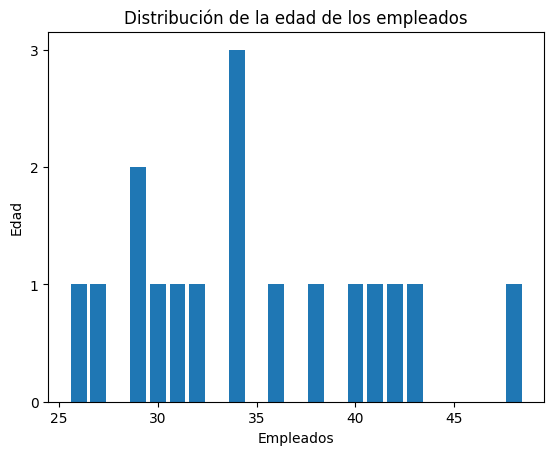

In [33]:
plt.bar(ages["Edad"], ages["Empleados"])
plt.yticks(range(int(ages["Empleados"].max()) + 1))

plt.xlabel('Empleados')
plt.ylabel('Edad')
plt.title('Distribución de la edad de los empleados')
plt.show()

### **Edad media y desviación típica de los empleados**

Edad Media

In [34]:
#Importamos el módulo statistics para el uso de las funciones mean y stdev
import statistics

#Cálculo de la edad media
average = statistics.mean(df_employee["EDAD"])
print(f"La edad media de los empleados es: {average} años")

La edad media de los empleados es: 34.94117647058823 años


Desviación típica

In [35]:
#Cálculo de la desviación típica
deviation = statistics.stdev(df_employee["EDAD"])
print(f"La desviación típica de los empleados es: {deviation:.2f} años")

La desviación típica de los empleados es: 6.24 años


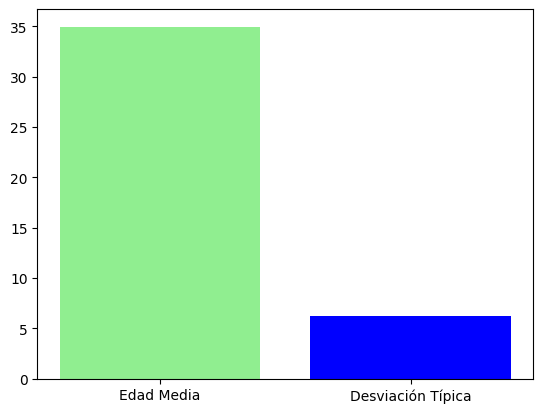

In [36]:
#Gráfica
tags = ["Edad Media", "Desviación Típica"]
values = [average, deviation]
plt.bar(tags, values, color=["lightgreen", "blue"])
plt.show()

# **Datos de Proyectos**

### **Número de proyectos activos, finalizados y total**

Proyectos Activos

In [37]:
df_project["F_FIN"] = pd.to_datetime(df_project["F_FIN"])

active = df_project[(df_project["F_BAJA"].isnull()) & (df_project["F_FIN"].isnull() |
 (df_project["F_FIN"] < datetime.now()))]


finished = df_project[(df_project["F_FIN"] >= datetime.now())]

total = df_project

print(f"Número de proyectos activos: {len(active)}")
print(f"Número de proyectos finalizados: {len(finished)}")
print(f"Número de proyectos totales: {len(total)}")



Número de proyectos activos: 10
Número de proyectos finalizados: 1
Número de proyectos totales: 11


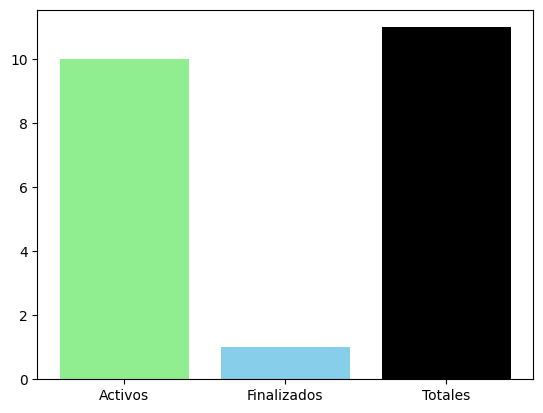

In [38]:
tags = ["Activos", "Finalizados", "Totales"]
values = [len(active), len(finished), len(total)]
plt.bar(tags, values, color=["lightgreen", "skyblue", "black"])
plt.show()

### **Distribución de la duración de los proyectos (histograma)**

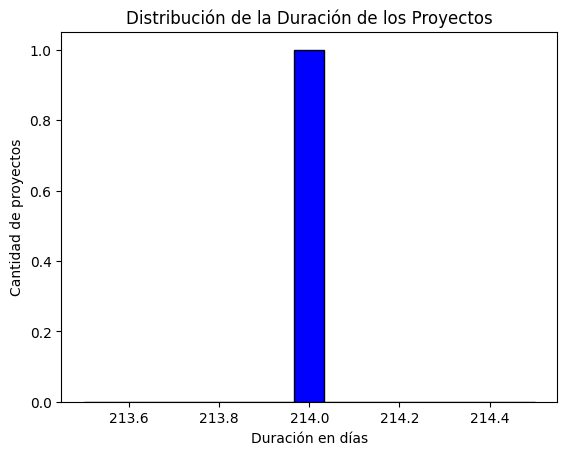

In [39]:
#Pasamos la fecha de inicio a datetime
df_project["F_INICIO"] = pd.to_datetime(df_project["F_INICIO"])
df_project["F_BAJA"] = pd.to_datetime(df_project["F_BAJA"])

# Duración de los proyectos. La fecha máxima entre fin y baja menos la fecha de inicio
df_project["Duracion"] = ((df_project[["F_FIN", "F_BAJA"]].max(axis=1) - df_project["F_INICIO"]).dt.days)

# Histograma
plt.hist(df_project["Duracion"], bins=15, color="blue", edgecolor="black")
plt.xlabel("Duración en días")
plt.ylabel("Cantidad de proyectos")
plt.title("Distribución de la Duración de los Proyectos")

# Mostrar el histograma
plt.show()

### **Distribución de proyectos por lugar**

In [40]:
places = df_project["TX_LUGAR"].value_counts()
print(places)

TX_LUGAR
Madrid       3
Barcelona    2
Valencia     1
Sevilla      1
Bilbao       1
Málaga       1
Zaragoza     1
Alicante     1
Name: count, dtype: int64


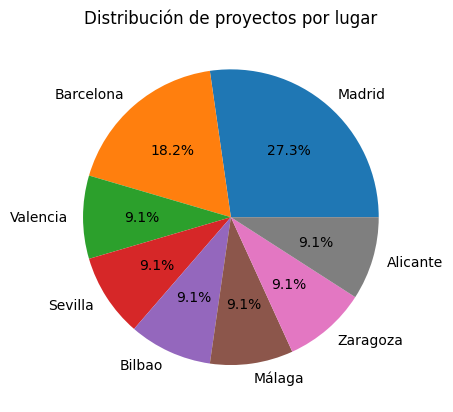

In [41]:
plt.pie(places.values, labels=places.index, autopct='%1.1f%%')
plt.title('Distribución de proyectos por lugar')
# Mostrar el gráfico
plt.show()

# **Datos de Proyectos y Empleados**

### **Distribución del número de proyectos a los que están asignados los empleados en activo**

   id_Empleado  id_Proyecto FECHA_ALTA
0            1           11 2024-05-21
1            2            7 2024-05-21
2            7           10 2024-05-21
3           10           10 2024-05-21
   id_Empleado  id_Proyecto FECHA_ALTA
0            1           11 2024-05-21
1            2            7 2024-05-21
2            7           10 2024-05-21
3           10           10 2024-05-21
id_Empleado
1     1
2     1
7     1
10    1
Name: id_Proyecto, dtype: int64


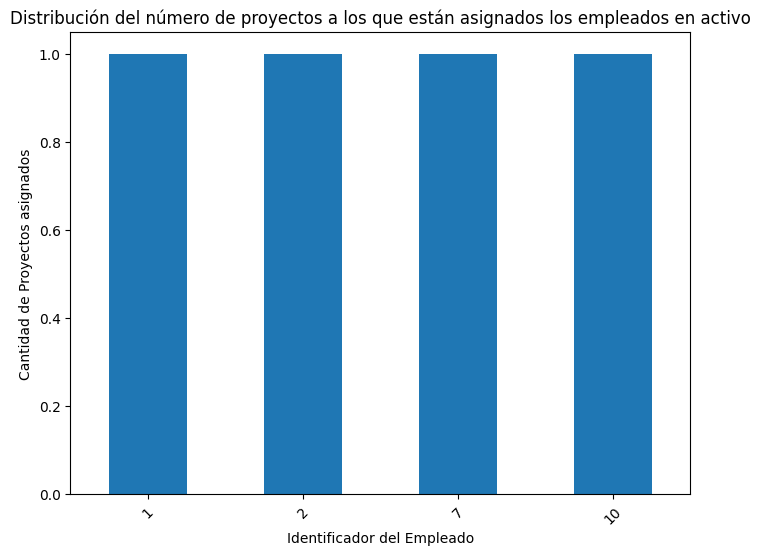

In [42]:
#Pasamos FECHA_ALTA a datetime
df_employees_projects["FECHA_ALTA"] = pd.to_datetime(df_employees_projects["FECHA_ALTA"])

#Filtramos los empleados activos por fecha de alta
activeEmployees = df_employees_projects[df_employees_projects["FECHA_ALTA"] <= datetime.now()]
print(activeEmployees.head())

#Agrupamos por idEmpleado y hacemos el conteo
projXEmp = activeEmployees.groupby("id_Empleado")["id_Proyecto"].count()
print(df_employees_projects.head())

print(projXEmp)

#Gráfica de barras
plt.figure(figsize=(8,6))
projXEmp.plot(kind='bar')

plt.title("Distribución del número de proyectos a los que están asignados los empleados en activo")
plt.xlabel("Identificador del Empleado")
plt.ylabel("Cantidad de Proyectos asignados")
plt.xticks(rotation=45)

plt.show()

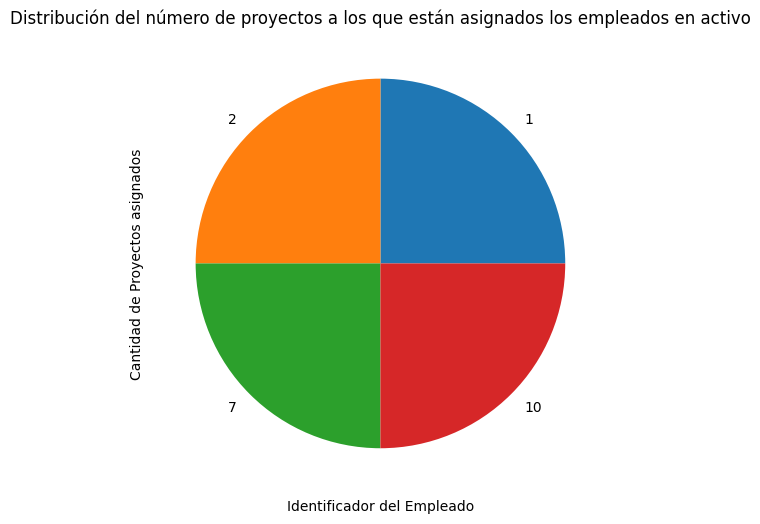

In [43]:
#Gráfica circular
plt.figure(figsize=(8,6))
projXEmp.plot(kind='pie')

plt.title("Distribución del número de proyectos a los que están asignados los empleados en activo")
plt.xlabel("Identificador del Empleado")
plt.ylabel("Cantidad de Proyectos asignados")
plt.xticks(rotation=45)

plt.show()

### **Top 5 proyectos con más personas asignadas**

In [44]:
#Número de Empleados activos con Fecha de Alta vigente, agrupados por el id del proyecto
assigned = activeEmployees.groupby("id_Proyecto")["id_Empleado"].count()

#Ordenados por orden descendente y seleccionados los 5 mayores
top5Assigned = assigned.sort_values(ascending=False).head(5)
print(top5Assigned)

id_Proyecto
10    2
7     1
11    1
Name: id_Empleado, dtype: int64


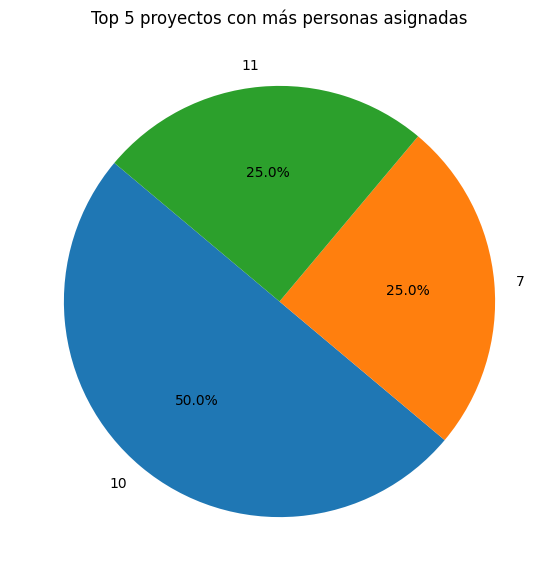

In [45]:
#Gráfico
plt.figure(figsize=(7,7))
top5Assigned.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title("Top 5 proyectos con más personas asignadas")
plt.ylabel('')
plt.show()

### **Lista de proyectos sin personas asignadas (detección de anomalía)**

In [46]:
#Aunque ya las tenemos pasadas a datetime, vuelvo a hacer la conversión para que este código funcione de forma autónoma
df_project["F_INICIO"] = pd.to_datetime(df_project["F_INICIO"])
df_project["F_FIN"] = pd.to_datetime(df_project["F_FIN"])
df_project["F_BAJA"] = pd.to_datetime(df_project["F_BAJA"])
df_employees_projects["FECHA_ALTA"] = pd.to_datetime(df_employees_projects["FECHA_ALTA"])

# Verificar que las columnas de proyectos tengan el nombre correcto
if 'ID_PROYECTO' in df_project.columns:
    df_project.rename(columns={'ID_PROYECTO': 'id_Proyecto'}, inplace=True)

# Verificar que las columnas de asignaciones tengan el nombre correcto
if 'id_Proyecto' not in df_employees_projects.columns:
    raise KeyError("La columna 'id_Proyecto' no se encuentra en df_employees_projects")


#Filtramos los empleados activos por fecha de alta
activeEmployees = df_employees_projects[df_employees_projects["FECHA_ALTA"] <= datetime.now()]

#Agrupación por id de Proyecto.
assigned = activeEmployees.groupby("id_Proyecto")["id_Empleado"].count().reset_index()

assigned.rename(columns={"id_Empleado": "employeeCount"}, inplace=True)

#Seleccionamos los proyectos que están activos, teniendo en cuenta Fecha de Fin y de Baja.
activeProjects = df_project[(df_project["F_BAJA"].isnull() | (df_project["F_BAJA"] > datetime.now())) &
                              (df_project["F_FIN"].isnull() | (df_project["F_FIN"] > datetime.now()))]


#Merge para obtener todos los proyectos activos
everyProject = pd.merge(activeProjects, assigned, on="id_Proyecto", how="left")
#Los que dan como resultado NaN, se completan como 0
everyProject["employeeCount"].fillna(0, inplace=True)

#Obtenemos aquellos cuyo conteo de empleados sea igual a 0.
everyProjectWithoutEmployee = everyProject[everyProject["employeeCount"] == 0]

print("Proyectos son Asignación")
print(everyProjectWithoutEmployee["id_Proyecto"].tolist())



Proyectos son Asignación
[1, 2, 3, 4, 5, 6, 8, 9]
